# MNIST Handwritten Digit Classification

Here, we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves.

### Import the necessary modules

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Import the data using Keras

In [4]:
# already splitting into training and testing data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

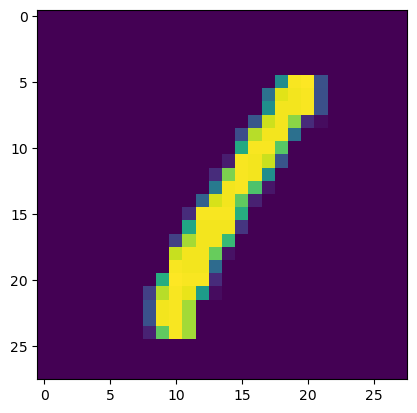

In [7]:
# checking a random image
plt.imshow(X_train[3])
plt.show()

In [8]:
# check the output for the particular image
y_train[3]

1

In [9]:
X_train.shape

(60000, 28, 28)

We bring the data in the range (0,1). This is done to facilitate data analysis and modeling, and to reduce the impact of different scales on the accuracy of machine learning models.

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
X_test[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

The neural network we are designing will be having:
1. **28 * 28 = 784 inputs** (given as a single 1D flattened array) 
2. **10 outputs** which represent the digits from 0-9

In [13]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_train_flat.shape

(60000, 784)

In [14]:
X_test_flat = X_test.reshape(len(X_test), 28*28)
X_test_flat.shape

(10000, 784)

### Creating a simple neural network
With only input and output layers, and no hidden layers.

In [15]:
# using Keras to create a dense layer, since each and every point would be connected 
# the activation function used here is the sigmoid function
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

# adam optimiser is being used, which adapts the learning rate during training to update the model's weights efficiently.
# Categorical cross-entropy is used here because it's suitable for multi-class classification problems with integer labels.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# now we train the neural network using the data
# each epoch corresponds to one pass over the entire training dataset. 
model.fit(X_train_flat, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4659 - accuracy: 0.8793
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3044 - accuracy: 0.9146
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9215
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9253
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2617 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2580 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2552 - accuracy: 0.9298
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2533 - accuracy: 0.9305
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.251

### Model evaluation and prediction

In [16]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2678 - accuracy: 0.9267


[0.26783448457717896, 0.9266999959945679]

Now we choose a number at random from the 10000 values in the test data and check if the neural network predicts the digit accurately.

In [ ]:
random_num = np.random.choice(np.arange(0, 10000))
plt.imshow(X_test[random_num])
plt.show()

In [ ]:
# predicting the values from the test data
y_predict = model.predict(X_test_flat)

In [ ]:
# now this array contains some values, the maximum out of these values would indicate the number we want to find
y_predict[random_num]

In [ ]:
np.argmax(y_predict[random_num])

In [ ]:
# do the above process for all numbers
y_predicted_labels = np.array([np.argmax(i) for i in y_predict])
y_predicted_labels

In [ ]:
y_test

We make use of a confusion matrix which is a table used to evaluate the performance of a classification model by comparing the predicted labels with the actual labels of a dataset.

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Neural network with one hidden layer

In [ ]:
# adding two layers, one of output size 200 (which indicates the number of nodes in the hidden layer)
# and another of size 10 (which is the actual output layer)
model = keras.Sequential([keras.layers.Dense(200, input_shape=(784,), activation='relu'), keras.layers.Dense(10, activation='sigmoid')])
# using the same error measures as the previous one
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flat, y_train, epochs=10)

In [ ]:
# evaluate this new model
model.evaluate(X_test_flat, y_test)

In [ ]:
# make a list of the predicted values, and create a new confusion matrix
y_predict = model.predict(X_test_flat)
y_predict_labels = np.array([np.argmax(i) for i in y_predict])

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)

In [ ]:
# we can now observe that the number of erroneous outputs are reduced when one hidden layer is introduced
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Conclusion

Thus, we can say that we have successfully implemented a dense neural network using Keras and Tensorflow for classification of handwritten digits. We have also improved the accuracy of the network by adding a hidden layer, which has shown better results of predictions.